In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

In [5]:
rebrickable_csv_base_dir = r'D:\MyDocuments\Downloads\rebrickable'

In [10]:
inventories_df = pd.read_csv(rebrickable_csv_base_dir + "\inventories.csv")

In [11]:
inventories_df.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [12]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27792 entries, 0 to 27791
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27792 non-null  int64 
 1   version  27792 non-null  int64 
 2   set_num  27792 non-null  object
dtypes: int64(2), object(1)
memory usage: 651.5+ KB


In [70]:
len(inventories_df)

27792

In [13]:
sets_df = pd.read_csv(rebrickable_csv_base_dir + "\sets.csv")

In [14]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [16]:
sets_df.tail(10)

,set_num,name,year,theme_id,num_parts
16256,WHITEHOUSE-1,Micro White House,2015,598,59
16257,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
16258,WILLIAM-1,Will.i.am,2016,535,6
16259,WISHINGWELL-1,Wishing Well,2013,494,28
16260,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
16261,XMASTREE-1,Christmas Tree,2019,410,26
16262,XWING-1,Mini X-Wing Fighter,2019,158,60
16263,XWING-2,X-Wing Trench Run,2019,158,52
16264,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
16265,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


In [23]:
year_groupby = sets_df.groupby('year')

In [24]:
year_groupby.count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,790,790,790,790
2018,816,816,816,816
2019,865,865,865,865


In [25]:
theme_groupby = sets_df.groupby('theme_id')

In [26]:
theme_groupby.count()

,set_num,name,year,num_parts
theme_id,,,,
1,178,178,178,178
2,4,4,4,4
3,18,18,18,18
4,39,39,39,39
5,11,11,11,11
...,...,...,...,...
708,43,43,43,43
709,6,6,6,6
710,2,2,2,2


In [358]:
themes_df = pd.read_csv(rebrickable_csv_base_dir + "\\themes.csv")

In [359]:
themes_df.head(10)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
5,6,Airport,5.0
6,7,Construction,5.0
7,8,Farm,5.0
8,9,Fire,5.0
9,10,Harbor,5.0


In [345]:
themes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         597 non-null    int64  
 1   name       597 non-null    object 
 2   parent_id  465 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.1+ KB


In [369]:
themes_df[ themes_df['parent_id'].isnull()].head(50)

,id,name,parent_id
0,1,Technic,NaN
21,22,Creator,NaN
46,50,Town,NaN
105,112,Racers,NaN
118,126,Space,NaN
139,147,Pirates,NaN
146,155,Modular Buildings,NaN
149,158,Star Wars,NaN
151,186,Castle,NaN
167,204,Designer Sets,NaN


In [370]:
themes_df.tail(10)

,id,name,parent_id
587,703,Constraction,696.0
588,704,Guardians of the Galaxy,696.0
589,705,Iron Man,696.0
590,706,Spider-Man,696.0
591,707,X-Men,696.0
592,708,The LEGO Batman Movie,697.0
593,709,LEGO Art,NaN
594,710,Harry Potter,207.0
595,711,The LEGO Batman Movie Series 2,535.0
596,712,Series 21 Minifigures,535.0


In [371]:
basic_themes_df = themes_df.loc[themes_df['parent_id'].isnull()]

In [372]:
len(basic_themes_df)

132

In [373]:
pd.set_option("max_row", 10)

In [374]:
basic_themes_df.tail(50)

,id,name,parent_id
411,507,Educational and Dacta,NaN
437,535,Collectible Minifigures,NaN
460,558,Monster Fighters,NaN
461,559,Value Packs,NaN
462,560,Universe,NaN
...,...,...,...
577,693,Monkie Kid,NaN
578,694,Brick Sketches,NaN
579,695,Super Heroes DC,NaN
580,696,Super Heroes Marvel,NaN


In [375]:
colors_df = pd.read_csv(rebrickable_csv_base_dir + "\\colors.csv")

In [376]:
len(colors_df)

186

In [377]:
colors_df.head(30)

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
25,26,Magenta,923978,f
26,27,Lime,BBE90B,f
27,28,Dark Tan,958A73,f
28,29,Bright Pink,E4ADC8,f


In [378]:
colors_df.loc[ colors_df['name'].str.contains('green', na=False, case=False)]

,id,name,rgb,is_trans
3,2,Green,237841,f
11,10,Bright Green,4B9F4A,f
17,17,Light Green,C2DAB8,f
33,34,Trans-Green,84B68D,t
34,35,Trans-Bright Green,D9E4A7,t
...,...,...,...,...
158,1032,Modulex Aqua Green,27867E,f
168,1042,Modulex Foil Dark Green,006400,f
169,1043,Modulex Foil Light Green,7DB538,f
183,1057,Trans-Light Bright Green,C9E788,t


In [379]:
part_categories_df =  pd.read_csv(rebrickable_csv_base_dir + "\\part_categories.csv")

In [380]:
part_categories_df.head(20)

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged
...,...,...
15,18,"Hinges, Arms and Turntables"
16,19,Tiles
17,20,Bricks Round and Cones
18,21,Plates Round and Dishes


In [381]:
part_categories_df.tail(10)

,id,name
55,58,Stickers
56,59,Minifig Heads
57,60,Minifig Upper Body
58,61,Minifig Lower Body
59,62,Minidoll Heads
60,63,Minidoll Upper Body
61,64,Minidoll Lower Body
62,65,Minifig Headwear
63,66,Modulex
64,67,Tiles Round and Curved


In [68]:
elements_df =  pd.read_csv(rebrickable_csv_base_dir + "\\elements.csv")

In [69]:
elements_df.head(5)

,element_id,part_num,color_id
0,4275423,53657,1004
1,6194308,92926,71
2,6229123,26561,4
3,4241969,51035,1004
4,4257250,50899pat0001,-1


# Brbrickable.com API 시험

## Rebrickable 에서 MySet 을 가지고 오자
 * https://rebrickable.com/api/v3/docs/?key=xxxxxxxxxx
 * Key 생성 : https://rebrickable.com/users/toanyone/settings/#api

API 
'''
GET /api/v3/users/{user_token}/allparts/Get a list of all the Parts in all the user's Part Lists as well as the Parts inside Sets in the user's Set Lists
GET /api/v3/users/{user_token}/partlists/

In [72]:
!pip install rebrick

## rebrickable github exmaple code
```python
import rebrick
import json

# init rebrick module for general reading
rebrick.init("your_API_KEY_here")

# get set info
response = rebrick.lego.get_set(6608)
print(json.loads(response.read()))

# init rebrick module including user reading
rebrick.init("your_API_KEY_here", "your_USER_TOKEN_here")

# if you don't know the user token you can use your login credentials
rebrick.init("your_API_KEY_here", "your_username_here", "your_password_here")

# get user partlists
response = rebrick.users.get_partlists()
print(json.loads(response.read()))
```

## token 가지고 오기
```sh
curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' --header 'Authorization: key 0196fcd597060fb52c2f671e1a296169' -d 'username=toanyone%40gmail.com&password=Ghkss%243v3r' 'https://rebrickable.com/api/v3/users/_token/'
{"user_token":"32c3650e279c68ddf7ea9502730f9cf83fbccd38303727d6c807b9aad0108405"}
```

In [101]:
rebrickable_key = '0196fcd597060fb52c2f671e1a296169'
rebrickable_id = 'toanyone@gmail.com'
rebrickable_pw = r'Ghkss$3v3r'

In [102]:
import rebrick
import json

In [103]:
rebrickable_token='32c3650e279c68ddf7ea9502730f9cf83fbccd38303727d6c807b9aad0108405'

In [104]:
rebrick.init(rebrickable_key, rebrickable_token)
rebrick.init(rebrickable_key, rebrickable_id, rebrickable_pw)
# get user partlists


In [ ]:
print(ret)

In [89]:
response = rebrick.users.get_partlists()
print(json.loads(response.read()))

{'count': 1, 'next': None, 'previous': None, 'results': [{'id': 127033, 'is_buildable': True, 'name': 'Part List', 'num_parts': 0}]}


In [106]:
import rebrick

# init Rebrick tool
rb = rebrick.Rebrick(rebrickable_key, rebrickable_token, silent=True)
# get set info
data = rb.get_set(6608)
print(data)

SET ID: 6608-1, Tractor


## 일단 skip

In [108]:
year_groupby = sets_df.groupby('year')

<AxesSubplot:ylabel='Frequency'>

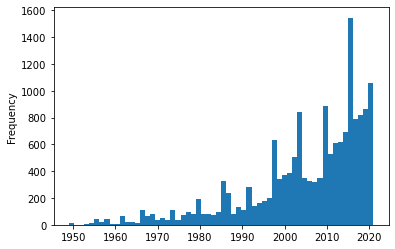

In [114]:
sets_df['year'].plot(kind='hist', bins=60) 

In [116]:
sets_df.head(10)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1978,186,15
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3
9,003-1,Master Mechanic Set,1966,366,403


In [118]:
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    16266 non-null  object
 1   name       16266 non-null  object
 2   year       16266 non-null  int64 
 3   theme_id   16266 non-null  int64 
 4   num_parts  16266 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 635.5+ KB


In [120]:
sets_groupby_year = sets_df.groupby('year')

In [121]:
sets_groupby_year

In [122]:
print(sets_groupby_year)

In [123]:
sets_groupby_year.count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,790,790,790,790
2018,816,816,816,816
2019,865,865,865,865


In [140]:
type(s)

pandas.core.series.Series

In [323]:
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    16266 non-null  object
 1   name       16266 non-null  object
 2   year       16266 non-null  int64 
 3   theme_id   16266 non-null  int64 
 4   num_parts  16266 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 635.5+ KB


In [324]:
themes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           597 non-null    int64 
 1   name         597 non-null    object
 2   parent_id    597 non-null    int64 
 3   basic_theme  597 non-null    object
dtypes: int64(2), object(2)
memory usage: 18.8+ KB


# themes dataframe 정리하기,  theeme 의 parent 정리, 가장 상위(root)  theme로 설정

In [382]:
themes_df.parent_id  = themes_df.parent_id.fillna(0).astype('int64')
themes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         597 non-null    int64 
 1   name       597 non-null    object
 2   parent_id  597 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.1+ KB


In [383]:
id_name_dict = dict(zip(themes_df.id, themes_df.name))
parent_dic = dict(zip(themes_df.id, themes_df.parent_id))

In [384]:
id_name_dict

{1: 'Technic',
 2: 'Arctic Technic',
 3: 'Competition',
 4: 'Expert Builder',
 5: 'Model',
 6: 'Airport',
 7: 'Construction',
 8: 'Farm',
 9: 'Fire',
 10: 'Harbor',
 11: 'Off-Road',
 12: 'Race',
 13: 'Riding Cycle',
 14: 'Robot',
 15: 'Traffic',
 16: 'RoboRiders',
 17: 'Speed Slammers',
 18: 'Star Wars',
 19: 'Supplemental',
 20: 'Throwbot Slizer',
 21: 'Universal Building Set',
 22: 'Creator',
 23: 'Basic Model',
 24: 'Airport',
 25: 'Castle',
 26: 'Construction',
 27: 'Race',
 28: 'Harbor',
 29: 'Train',
 30: 'Traffic',
 31: 'Creature',
 32: 'Robot',
 33: 'Food & Drink',
 34: 'Building',
 35: 'Cargo',
 37: 'Basic Set',
 38: 'Model',
 39: 'Traffic',
 40: 'Creature',
 42: 'Airport',
 43: 'Building',
 44: 'Recreation',
 45: 'Cargo',
 46: 'Harbor',
 48: 'Supplemental',
 49: 'Mecha',
 50: 'Town',
 51: 'Arctic',
 52: 'City',
 53: 'Airport',
 54: 'Cargo',
 55: 'Coast Guard',
 56: 'Construction',
 57: 'Farm',
 58: 'Fire',
 59: 'Harbor',
 60: 'Hospital',
 61: 'Police',
 62: 'Supplemental',
 6

In [385]:
def find_parent_theme(x):
    
    parent_id = parent_dic.get(x, 0)
    print("input:{}, parent:{}".format(x, parent_id))
    if parent_id == 0:
        return id_name_dict.get(x, 0)
    else:
        return find_parent_theme(parent_id)

In [386]:
find_parent_theme(6)

input:6, parent:5
input:5, parent:1
input:1, parent:0


'Technic'

In [387]:
find_parent_theme(6)

input:6, parent:5
input:5, parent:1
input:1, parent:0


'Technic'

In [388]:
themes_df['basic_theme'] = themes_df.id.apply(lambda x: find_parent_theme(x))


input:1, parent:0
input:2, parent:1
input:1, parent:0
input:3, parent:1
input:1, parent:0
input:4, parent:1
input:1, parent:0
input:5, parent:1
input:1, parent:0
input:6, parent:5
input:5, parent:1
input:1, parent:0
input:7, parent:5
input:5, parent:1
input:1, parent:0
input:8, parent:5
input:5, parent:1
input:1, parent:0
input:9, parent:5
input:5, parent:1
input:1, parent:0
input:10, parent:5
input:5, parent:1
input:1, parent:0
input:11, parent:5
input:5, parent:1
input:1, parent:0
input:12, parent:5
input:5, parent:1
input:1, parent:0
input:13, parent:5
input:5, parent:1
input:1, parent:0
input:14, parent:5
input:5, parent:1
input:1, parent:0
input:15, parent:5
input:5, parent:1
input:1, parent:0
input:16, parent:1
input:1, parent:0
input:17, parent:1
input:1, parent:0
input:18, parent:1
input:1, parent:0
input:19, parent:1
input:1, parent:0
input:20, parent:1
input:1, parent:0
input:21, parent:1
input:1, parent:0
input:22, parent:0
input:23, parent:22
input:22, parent:0
input:24, pa

In [389]:
themes_df.head(20)

,id,name,parent_id,basic_theme
0,1,Technic,0,Technic
1,2,Arctic Technic,1,Technic
2,3,Competition,1,Technic
3,4,Expert Builder,1,Technic
4,5,Model,1,Technic
...,...,...,...,...
15,16,RoboRiders,1,Technic
16,17,Speed Slammers,1,Technic
17,18,Star Wars,1,Technic
18,19,Supplemental,1,Technic


In [390]:
merged_sets_df = sets_df.merge(themes_df, how='inner', left_on='theme_id', right_on='id')

In [391]:
len(merged_sets_df)

16266

In [392]:
len(sets_df)

16266

In [393]:
merged_sets_df.rename({'name_y':'theme'}, axis =1, inplace=True)

In [394]:
merged_sets_df.head(4)

,set_num,name_x,year,theme_id,num_parts,id,theme,parent_id,basic_theme
0,001-1,Gears,1965,1,43,1,Technic,0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,1,Technic,0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,1,Technic,0,Technic


In [395]:
s= merged_sets_df.groupby('year')['basic_theme'].value_counts()

In [396]:
s

year  basic_theme    
1949  System              5
1950  System              6
1953  System              4
1954  System             14
1955  System             27
                         ..
2021  Monkie Kid          1
      Promotional         1
      Seasonal            1
      Speed Champions     1
      Super Heroes DC     1
Name: basic_theme, Length: 1149, dtype: int64

In [397]:
groupby = merged_sets_df.groupby('basic_theme')

In [405]:
groupby['set_num'].count().sort_values(ascending=False)[:30]

basic_theme
Town                       1337
Duplo                      1278
Gear                       1240
Star Wars                   799
Collectible Minifigures     726
                           ... 
Bulk Bricks                 137
Legends of Chima            136
Nexo Knights                110
Harry Potter                107
Hero Factory                106
Name: set_num, Length: 30, dtype: int64

In [406]:
s= merged_sets_df.groupby('year')['basic_theme'].value_counts()

In [411]:
s.sort_values(ascending=False)[:30]

year  basic_theme            
2019  Gear                       150
2017  Gear                       125
1987  Service Packs              102
2014  Gear                       101
2002  Educational and Dacta      101
                                ... 
2013  Collectible Minifigures     61
2014  Collectible Minifigures     60
2010  Gear                        60
2020  Collectible Minifigures     58
2015  Collectible Minifigures     58
Name: basic_theme, Length: 30, dtype: int64

<AxesSubplot:xlabel='year'>

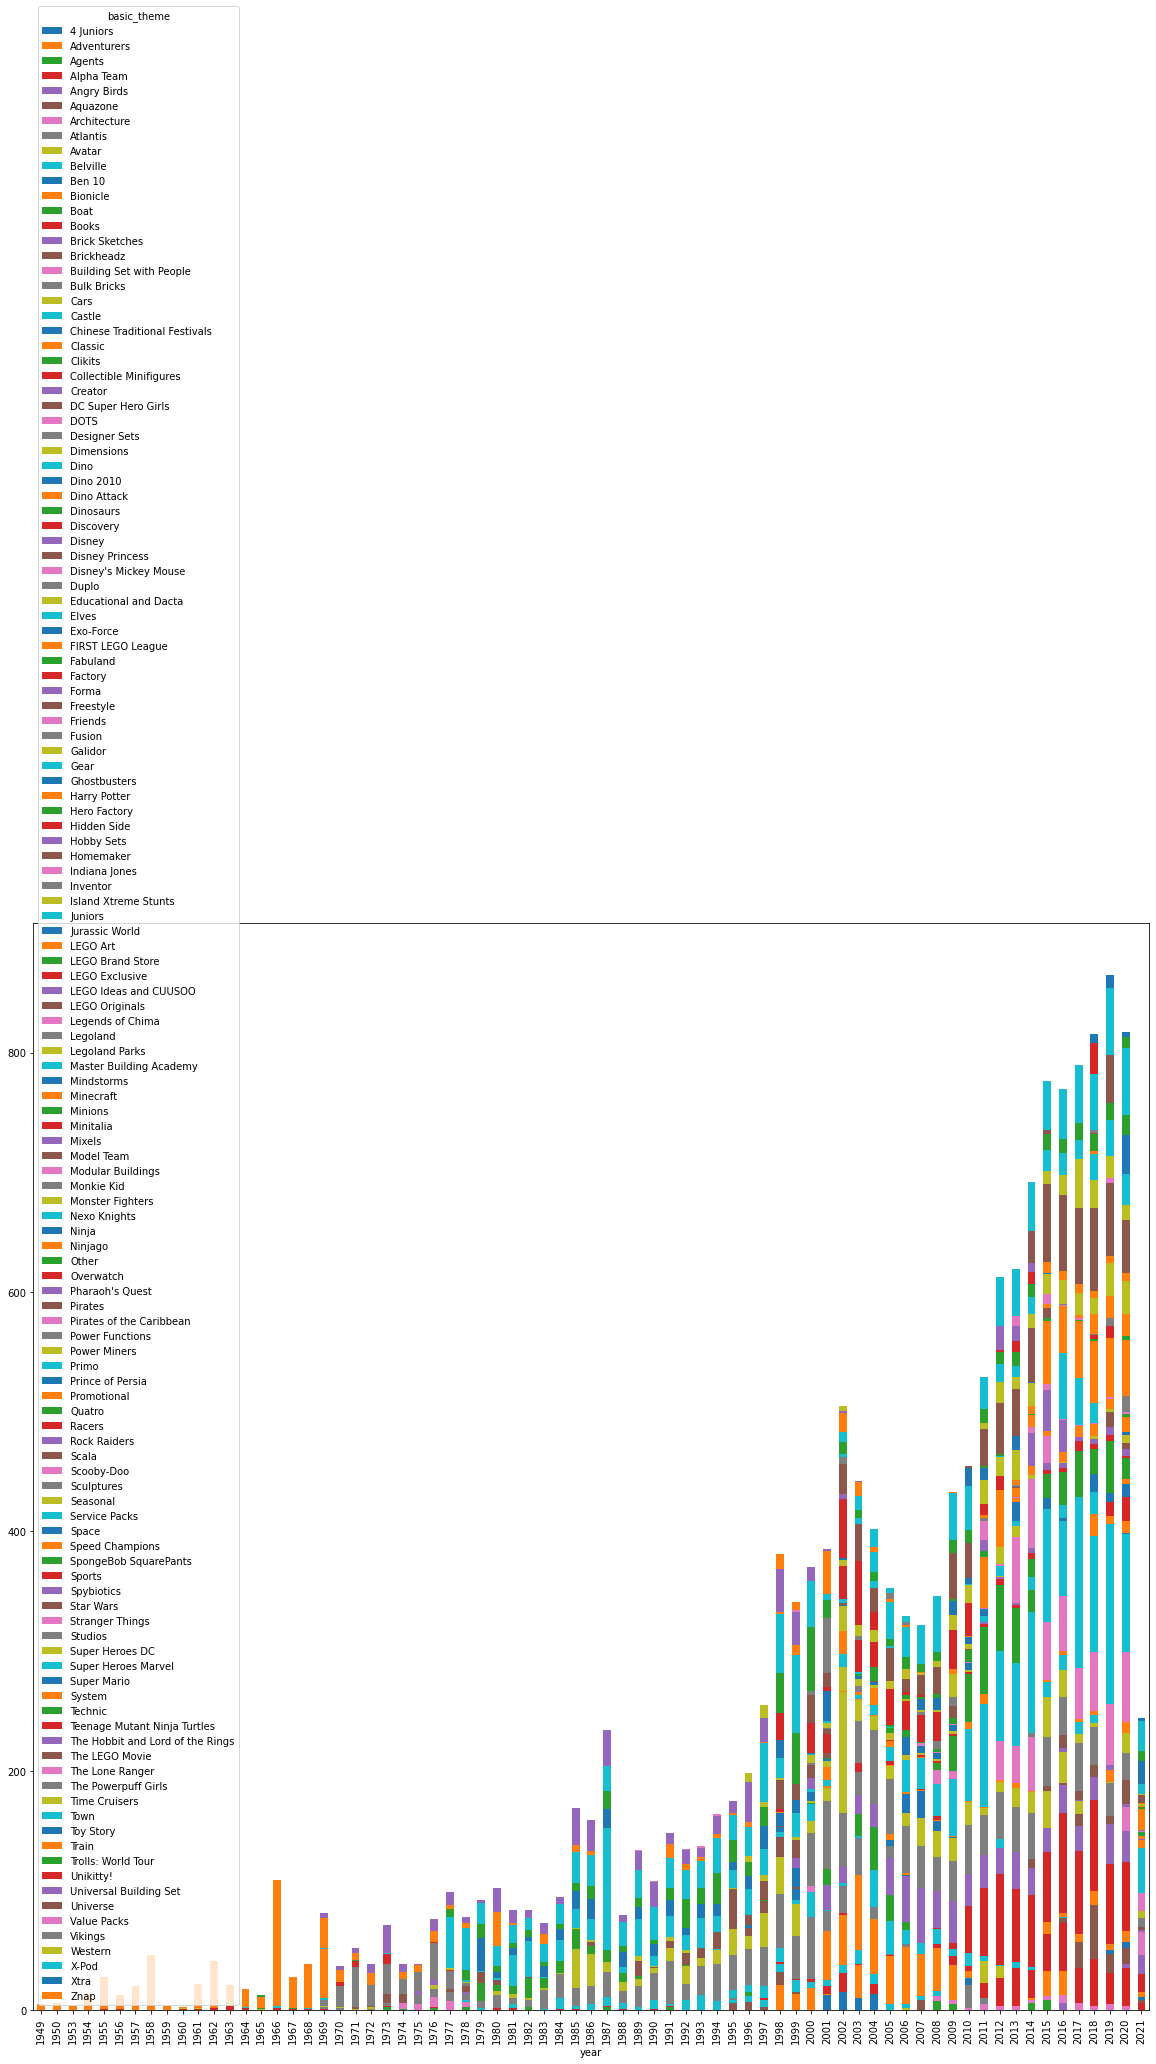

In [407]:
s.unstack().plot.bar(stacked=True, figsize=(20,a20))

In [408]:
print(s.sort_values())

year  basic_theme          
2021  Super Heroes DC            1
2013  Pirates                    1
1984  Educational and Dacta      1
      Books                      1
2010  Modular Buildings          1
                              ... 
2002  Educational and Dacta    101
2014  Gear                     101
1987  Service Packs            102
2017  Gear                     125
2019  Gear                     150
Name: basic_theme, Length: 1149, dtype: int64


In [176]:
s.sort_values(ascending=Fale).tail(30)

year  theme            
2012  Ninjago               47
2018  Ninjago               47
2020  Ninjago               47
2017  Ninjago The Movie     47
1987  Service Packs         48
                          ... 
2020  Gear                  71
2018  Gear                  76
2017  Gear                  82
1966  Supplemental          84
2019  Gear                 116
Name: theme, Length: 30, dtype: int64

In [183]:
s

year  theme              
1949  System                 3
      Supplemental           2
1950  Supplemental           6
1953  Supplemental           3
      Basic Set              1
                            ..
2021  Monkie Kid             1
      Promotional            1
      Speed Champions        1
      Super Heroes Marvel    1
      Valentine              1
Name: theme, Length: 2525, dtype: int64

In [184]:
type(s)

pandas.core.series.Series

In [185]:
s.index

MultiIndex([(1949,                'System'),
            (1949,          'Supplemental'),
            (1950,          'Supplemental'),
            (1953,          'Supplemental'),
            (1953,             'Basic Set'),
            (1954,          'Supplemental'),
            (1954,             'Town Plan'),
            (1955,          'Supplemental'),
            (1955,             'Town Plan'),
            (1955,                 'Books'),
            ...
            (2021,                'Batman'),
            (2021, 'Disney's Mickey Mouse'),
            (2021,                  'Farm'),
            (2021, 'LEGO Ideas and CUUSOO'),
            (2021,     'Modular Buildings'),
            (2021,            'Monkie Kid'),
            (2021,           'Promotional'),
            (2021,       'Speed Champions'),
            (2021,   'Super Heroes Marvel'),
            (2021,             'Valentine')],
           names=['year', 'theme'], length=2525)

In [186]:
s[2020]

theme
Gear                         71
Friends                      59
Ninjago                      47
Star Wars                    44
Super Mario                  32
                             ..
Off-Road                      1
Riding Cycle                  1
UCS                           1
Ultimate Collector Series     1
Valentine                     1
Name: theme, Length: 75, dtype: int64

In [187]:
set_theme_2020 = s[2020]

In [188]:
set_theme_2020

theme
Gear                         71
Friends                      59
Ninjago                      47
Star Wars                    44
Super Mario                  32
                             ..
Off-Road                      1
Riding Cycle                  1
UCS                           1
Ultimate Collector Series     1
Valentine                     1
Name: theme, Length: 75, dtype: int64

In [191]:
print(set_theme_2020)

theme
Gear                         71
Friends                      59
Ninjago                      47
Star Wars                    44
Super Mario                  32
                             ..
Off-Road                      1
Riding Cycle                  1
UCS                           1
Ultimate Collector Series     1
Valentine                     1
Name: theme, Length: 75, dtype: int64


In [196]:
pd.set_option('display.max_rows', 50)

In [197]:
print(set_theme_2020)

theme
Gear                         71
Friends                      59
Ninjago                      47
Star Wars                    44
Super Mario                  32
                             ..
Off-Road                      1
Riding Cycle                  1
UCS                           1
Ultimate Collector Series     1
Valentine                     1
Name: theme, Length: 75, dtype: int64


<AxesSubplot:xlabel='theme'>

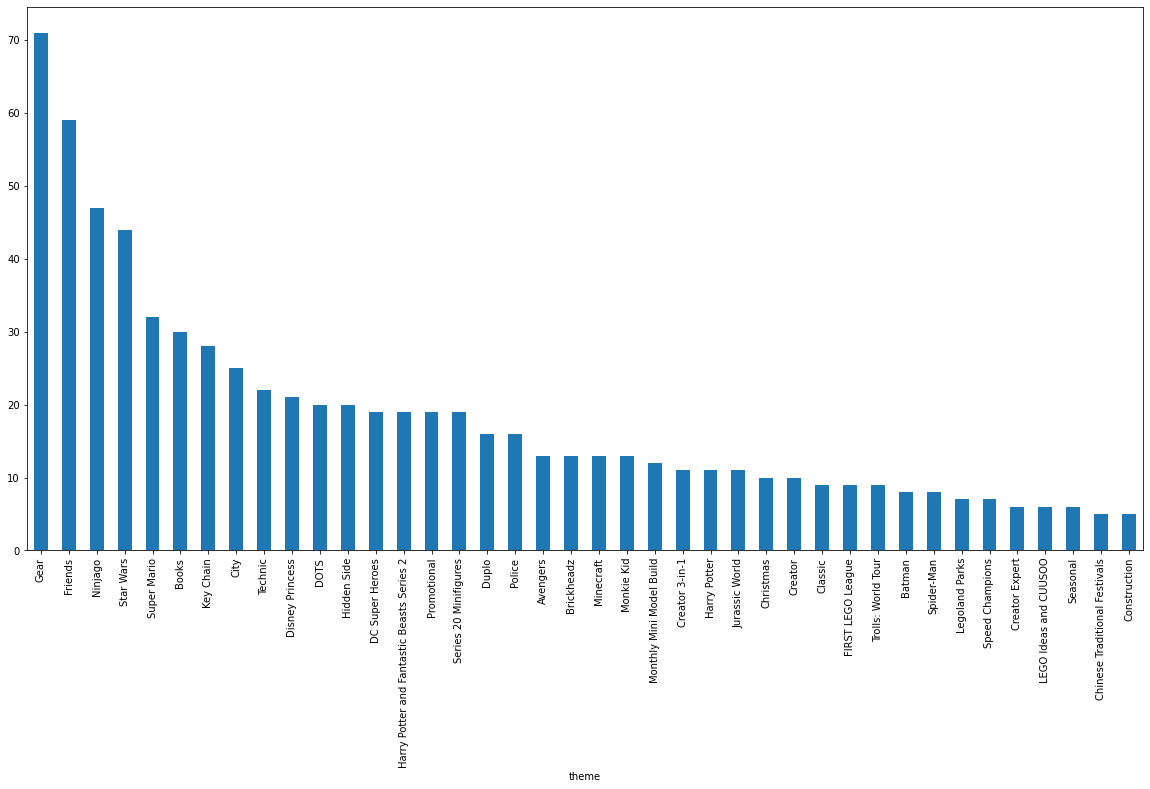

In [204]:
set_theme_2020[:40].plot(kind='bar', figsize=(20,10))

In [210]:
merged_sets_df[(merged_sets_df['year'] == 2020 ) & (merged_sets_df['theme'] == 'Creator 3-in-1')].head(20)

,set_num,name_x,year,theme_id,num_parts,id,theme,parent_id
12608,30574-1,Cat,2020,672,55,672,Creator 3-in-1,22.0
12706,31099-1,Propeller Plane,2020,672,128,672,Creator 3-in-1,22.0
12707,31100-1,Sports Car,2020,672,134,672,Creator 3-in-1,22.0
12708,31101-1,Monster Truck,2020,672,163,672,Creator 3-in-1,22.0
12709,31102-1,Fire Dragon,2020,672,234,672,Creator 3-in-1,22.0
12710,31103-1,Rocket Truck,2020,672,198,672,Creator 3-in-1,22.0
12711,31104-1,Monster Burger Truck,2020,672,499,672,Creator 3-in-1,22.0
12712,31105-1,Townhouse Toy Store,2020,672,554,672,Creator 3-in-1,22.0
12713,31107-1,Space Rover Explorer,2020,672,510,672,Creator 3-in-1,22.0
12714,31108-1,Caravan Family Holiday,2020,672,766,672,Creator 3-in-1,22.0


In [215]:
merged_sets_df.sort_values('num_parts',ascending=False ).head(30)

,set_num,name_x,year,theme_id,num_parts,id,theme,parent_id
12157,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,571,Legends of Chima,NaN
2413,10276-1,Colosseum,2020,673,9036,673,Creator Expert,22.0
2245,75192-1,UCS Millennium Falcon,2017,171,7541,171,Ultimate Collector Series,158.0
3195,71043-1,Hogwarts Castle,2018,246,6020,246,Harry Potter,NaN
2401,10256-1,Taj Mahal,2017,673,5923,673,Creator Expert,22.0
2382,10189-1,Taj Mahal,2008,673,5922,673,Creator Expert,22.0
5653,71741-1,NINJAGO City Gardens,2021,435,5650,435,Ninjago,NaN
3213,75978-1,Diagon Alley,2020,246,5545,246,Harry Potter,NaN
9968,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,158,5462,158,Star Wars,NaN
4089,2000409-1,Window Exploration Bag,2010,507,5200,507,Educational and Dacta,NaN


# element ,  color 비교

In [412]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55794 entries, 0 to 55793
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   element_id  55794 non-null  object
 1   part_num    55794 non-null  object
 2   color_id    55794 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [413]:
len(elements_df)

55794

In [414]:
elements_df.head(10)

,element_id,part_num,color_id
0,4275423,53657,1004
1,6194308,92926,71
2,6229123,26561,4
3,4241969,51035,1004
4,4257250,50899pat0001,-1
5,4144366,40472,9999
6,4116792,32083,0
7,4226929,32530,71
8,6284189,32072,14
9,6151004,25532,-1


In [473]:
c_df = elements_df.merge(colors_df, how='inner', left_on='color_id' , right_on='id')

In [474]:
c_df.head(10)

,element_id,part_num,color_id,id,name,rgb,is_trans
0,4275423,53657,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
1,4241969,51035,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
2,4278403,53658,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
3,4200351,45455,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
4,4241987,51036,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
5,4254676,51675,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
6,4200397,46282,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
7,4259784,51674,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
8,6194308,92926,71,71,Light Bluish Gray,A0A5A9,f
9,4226929,32530,71,71,Light Bluish Gray,A0A5A9,f


In [420]:
groupby= c_df.groupby('name')

In [421]:
groupby.count()

,element_id,part_num,color_id,id,rgb,is_trans
name,,,,,,
Aqua,21,21,21,21,21,21
Black,5632,5632,5632,5632,5632,5632
Blue,1835,1835,1835,1835,1835,1835
Blue-Violet,27,27,27,27,27,27
Bright Green,419,419,419,419,419,419
...,...,...,...,...,...,...
White,5437,5437,5437,5437,5437,5437
Yellow,3235,3235,3235,3235,3235,3235
Yellowish Green,135,135,135,135,135,135


In [427]:
groupby['element_id'].count().sort_values(ascending=False )


name
Black                5632
White                5437
Red                  3319
Yellow               3235
Light Bluish Gray    2599
                     ... 
Light Pink              1
Trans-Neon Yellow       1
Light Salmon            1
Pearl White             1
Maersk Blue             1
Name: element_id, Length: 135, dtype: int64

<AxesSubplot:xlabel='name'>

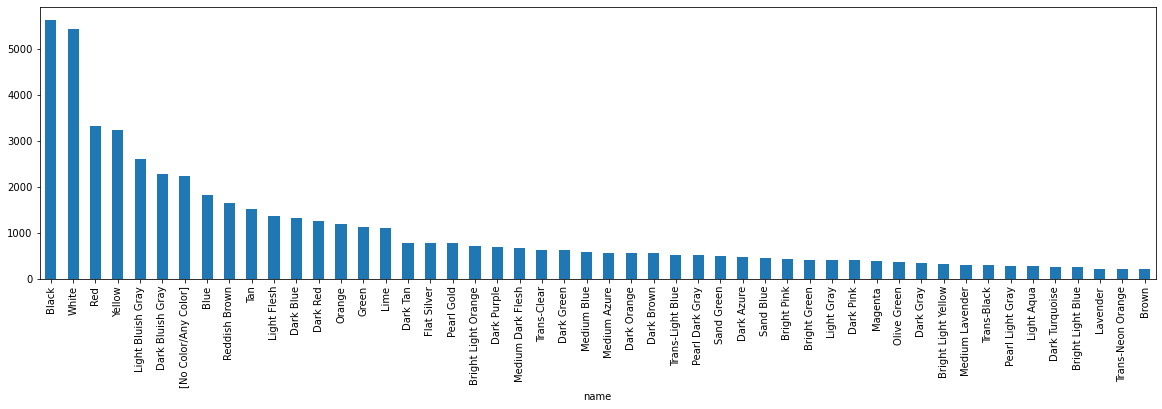

In [429]:
groupby['element_id'].count().sort_values(ascending=False )[:50].plot(kind='bar', figsize=(20,5))

In [431]:
!pip install webcolors

In [442]:
c_df.head(5)

,element_id,part_num,color_id,id,name,rgb,is_trans
0,4275423,53657,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
1,4241969,51035,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
2,4278403,53658,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
3,4200351,45455,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t
4,4241987,51036,1004,1004,Trans-Flame Yellowish Orange,FCB76D,t


In [458]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55794 entries, 0 to 55793
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   element_id  55794 non-null  object
 1   part_num    55794 non-null  object
 2   color_id    55794 non-null  int64 
 3   id          55794 non-null  int64 
 4   name        55794 non-null  object
 5   rgb         55794 non-null  object
 6   is_trans    55794 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [459]:
c_df['rgb'] = c_df.rgb.to_string()

In [460]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55794 entries, 0 to 55793
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   element_id  55794 non-null  object
 1   part_num    55794 non-null  object
 2   color_id    55794 non-null  int64 
 3   id          55794 non-null  int64 
 4   name        55794 non-null  object
 5   rgb         55794 non-null  object
 6   is_trans    55794 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [466]:
print('\#{}'.format(c_df['rgb'][0]))
                       

\#0        FCB76D
1        FCB76D
2        FCB76D
3        FCB76D
4        FCB76D
5        FCB76D
6        FCB76D
7        FCB76D
8        A0A5A9
9        A0A5A9
10       A0A5A9
11       A0A5A9
12       A0A5A9
13       A0A5A9
14       A0A5A9
15       A0A5A9
16       A0A5A9
17       A0A5A9
18       A0A5A9
19       A0A5A9
20       A0A5A9
21       A0A5A9
22       A0A5A9
23       A0A5A9
24       A0A5A9
25       A0A5A9
26       A0A5A9
27       A0A5A9
28       A0A5A9
29       A0A5A9
30       A0A5A9
31       A0A5A9
32       A0A5A9
33       A0A5A9
34       A0A5A9
35       A0A5A9
36       A0A5A9
37       A0A5A9
38       A0A5A9
39       A0A5A9
40       A0A5A9
41       A0A5A9
42       A0A5A9
43       A0A5A9
44       A0A5A9
45       A0A5A9
46       A0A5A9
47       A0A5A9
48       A0A5A9
49       A0A5A9
50       A0A5A9
51       A0A5A9
52       A0A5A9
53       A0A5A9
54       A0A5A9
55       A0A5A9
56       A0A5A9
57       A0A5A9
58       A0A5A9
59       A0A5A9
60       A0A5A9
61       A0A5A9
62    

In [475]:
c_df['color_name'] = c_df.rgb.apply(lambda x:  webcolors.hex_to_name('#' + x))

ValueError: '#FCB76D' has no defined color name in css3

In [432]:
import webcolors

In [433]:
 webcolors.hex_to_name(u'#daa520')

'goldenrod'

In [472]:
c_df

,element_id,part_num,color_id,id,name,rgb,is_trans
0,4275423,53657,1004,1004,Trans-Flame Yellowish Orange,0 FCB76D\n1 FCB76D\n2 FCB...,t
1,4241969,51035,1004,1004,Trans-Flame Yellowish Orange,0 FCB76D\n1 FCB76D\n2 FCB...,t
2,4278403,53658,1004,1004,Trans-Flame Yellowish Orange,0 FCB76D\n1 FCB76D\n2 FCB...,t
3,4200351,45455,1004,1004,Trans-Flame Yellowish Orange,0 FCB76D\n1 FCB76D\n2 FCB...,t
4,4241987,51036,1004,1004,Trans-Flame Yellowish Orange,0 FCB76D\n1 FCB76D\n2 FCB...,t
...,...,...,...,...,...,...,...
55789,6338852,72134,1055,1055,Trans-Clear Opal,0 FCB76D\n1 FCB76D\n2 FCB...,t
55790,4501142,22670,63,63,Chrome Pink,0 FCB76D\n1 FCB76D\n2 FCB...,f
55791,6295088,60601,1056,1056,Trans-Brown Opal,0 FCB76D\n1 FCB76D\n2 FCB...,t
55792,6323618,2431,1056,1056,Trans-Brown Opal,0 FCB76D\n1 FCB76D\n2 FCB...,t
